In [15]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
tf.__version__

'2.2.0'

In [17]:
x_data = [[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]]

#AND         
y_data = [[0],
          [0],
          [0],
          [1]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [18]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [19]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [20]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [21]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [22]:
sess = tf.Session()

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
vcost =[]

In [27]:
for step in range(10001):
    
    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
       
       
       print(cost1)

0.8591118
0.5276948
0.39758795
0.32300448
0.2741567
0.23914
0.21249127
0.19136624
0.1741248
0.15974316
0.14754203


Text(0.5, 0, 'epoch')

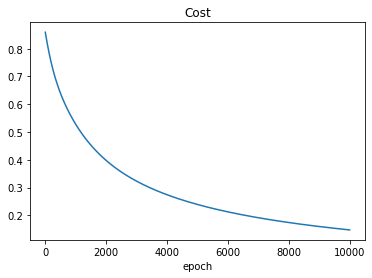

In [28]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [29]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [30]:
print(test1[0][0])

0.012299263


In [31]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})